# Supervised Learing

  This project was developed by group A2_7
  
  > Gonçalo Moreira - up202205521

  > Micaela Albino - up202205527

  > Lucas Greco - up202208296

## Project Objectives

The main goal of this project is to understand how supervised learning works byt creating, training and testing several AI models

### Theme

The database used in this project has 6855 UFC fights and our job is to "feed" some of them to different models and see if they can accuratly predict who the winner of a new fight is.

The database is available at: https://www.kaggle.com/datasets/joseph212/all-ufc-fight-outcomes


## Libraries used

The libraries used in this project are imported below, they feature:

- Data Manipulation Libraries: Pandas and Numpy
- Graph and Plot Creation Libraries: Seaborn and MatPlotLib
- Supervised Learning Model Creation, Training and Testing: SciKit-Learn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Loading the Data

The data is read from a csv file and a dataframe is created

In [5]:
def load_data(file_path):
    """Load the UFC dataset."""
    print(f"Loading dataset from {file_path}...")
    df = pd.read_csv(file_path)
    print(f"Dataset loaded. Shape: {df.shape}")
    return df

df = load_data('assets/clean_ufc_all_fights.csv')

Loading dataset from assets/clean_ufc_all_fights.csv...
Dataset loaded. Shape: (6855, 37)


In [6]:
df.head()

,fighter1,fighter2,event,fight_outcome,origin_fight_url,fighter1_Weight,fighter1_Reach,fighter1_Stance,fighter1_SLpM,fighter1_StrAcc,...,fighter1_Wins,fighter1_Losses,fighter1_Draws,fighter2_Wins,fighter2_Losses,fighter2_Draws,fighter1_Height_in,fighter2_Height_in,fighter1_Age,fighter2_Age
0,Charles Johnson,Ramazan Temirov,UFC Fight Night: Kape vs. Almabayev,fighter2,http://ufcstats.com/fight-details/206b8c14546d...,125.0,70,Switch,4.77,50,...,17,6,0,18,3,0,69.0,64.0,34.0,28.0
1,Andrea Lee,JJ Aldrich,UFC Fight Night: Kape vs. Almabayev,fighter2,http://ufcstats.com/fight-details/1ada4b9ee581...,125.0,69,Orthodox,4.71,46,...,13,10,0,13,7,0,66.0,65.0,36.0,32.0
2,Erin Blanchfield,JJ Aldrich,UFC Fight Night: Volkov vs. Rozenstruik,fighter1,http://ufcstats.com/fight-details/59b2bbb25196...,125.0,66,Orthodox,5.24,44,...,13,2,0,13,7,0,64.0,65.0,25.0,32.0
3,Danny Silva,Lucas Almeida,UFC Fight Night: Kape vs. Almabayev,fighter1,http://ufcstats.com/fight-details/1de799f17556...,145.0,70,Switch,8.30,58,...,9,1,0,15,3,0,71.0,71.0,28.0,34.0
4,Ricardo Ramos,Chepe Mariscal,UFC Fight Night: Kape vs. Almabayev,fighter2,http://ufcstats.com/fight-details/dd1df7f5a54f...,145.0,72,Orthodox,3.03,36,...,17,6,0,17,6,0,69.0,67.0,29.0,32.0


## Data Preprocessing

### Basic Pre Analysis

A basic pre analysis is important to undestand the nature of the values


In [7]:
df.describe()

,fighter1_Weight,fighter1_Reach,fighter1_SLpM,fighter1_StrAcc,fighter1_SApM,fighter1_StrDef,fighter1_TDAvg,fighter1_TDAcc,fighter1_TDDef,fighter1_SubAvg,...,fighter1_Wins,fighter1_Losses,fighter1_Draws,fighter2_Wins,fighter2_Losses,fighter2_Draws,fighter1_Height_in,fighter2_Height_in,fighter1_Age,fighter2_Age
count,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,...,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000
mean,165.720058,72.036032,3.602988,45.190810,3.413520,55.059664,1.606521,39.013567,62.355653,0.608869,...,19.245660,7.895259,0.205252,17.722830,7.476295,0.224070,70.154340,70.157257,37.969511,37.447702
std,35.161729,4.352804,1.223633,7.127568,1.137752,6.795875,1.237528,17.222534,18.210442,0.650458,...,8.194138,4.477789,0.513064,8.039327,4.227205,0.593937,3.598072,3.556794,5.835712,5.879306
min,115.000000,58.000000,0.150000,8.000000,0.400000,19.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,60.000000,60.000000,20.000000,22.000000
25%,135.000000,69.000000,2.745000,40.000000,2.640000,51.000000,0.650000,30.000000,53.000000,0.100000,...,13.000000,5.000000,0.000000,12.000000,4.000000,0.000000,67.000000,68.000000,34.000000,33.000000
50%,155.000000,72.000000,3.450000,45.000000,3.280000,55.000000,1.350000,39.000000,64.000000,0.500000,...,18.000000,7.000000,0.000000,17.000000,7.000000,0.000000,70.000000,70.000000,38.000000,37.000000
75%,185.000000,75.000000,4.360000,50.000000,4.040000,60.000000,2.270000,49.000000,75.000000,0.800000,...,24.000000,10.000000,0.000000,22.000000,10.000000,0.000000,73.000000,73.000000,42.000000,41.000000
max,265.000000,84.000000,11.230000,72.000000,15.480000,81.000000,9.690000,100.000000,100.000000,7.400000,...,91.000000,26.000000,8.000000,91.000000,26.000000,8.000000,83.000000,83.000000,61.000000,61.000000


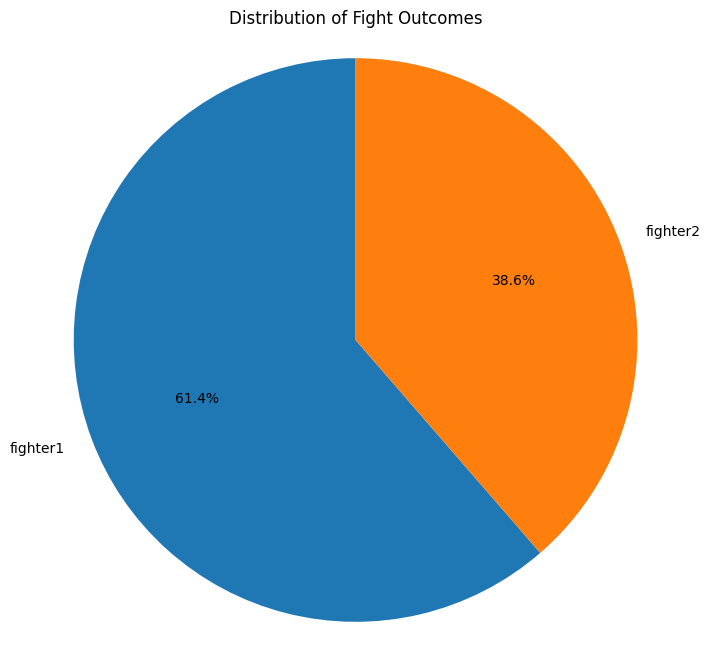

In [8]:
outcome_counts = df['fight_outcome'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fight Outcomes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
plt.close()

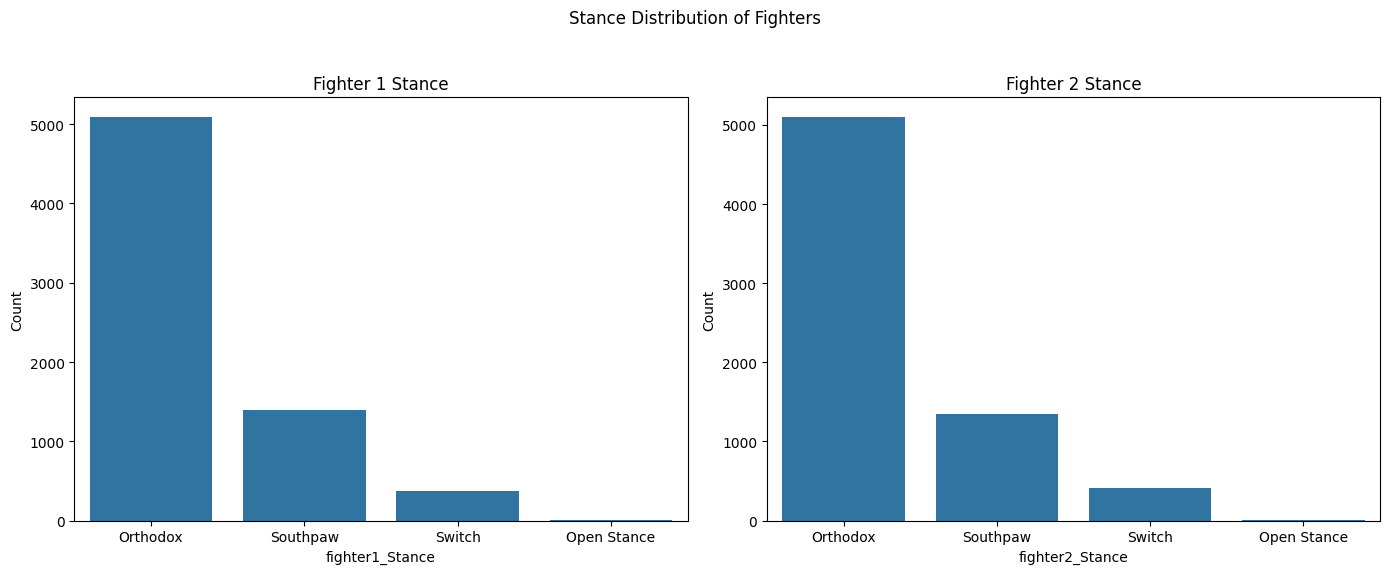

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Stance Distribution of Fighters')

if 'fighter1_Stance' in df.columns:
    stance1_counts = df['fighter1_Stance'].value_counts()
    sns.barplot(x=stance1_counts.index, y=stance1_counts.values, ax=axes[0])
    axes[0].set_title('Fighter 1 Stance')
    axes[0].set_ylabel('Count')
else:
    axes[0].set_title('Fighter 1 Stance (Coluna não encontrada)')

if 'fighter2_Stance' in df.columns:
    stance2_counts = df['fighter2_Stance'].value_counts()
    sns.barplot(x=stance2_counts.index, y=stance2_counts.values, ax=axes[1])
    axes[1].set_title('Fighter 2 Stance')
    axes[1].set_ylabel('Count')
else:
    axes[1].set_title('Fighter 2 Stance (Coluna não encontrada)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
plt.close()

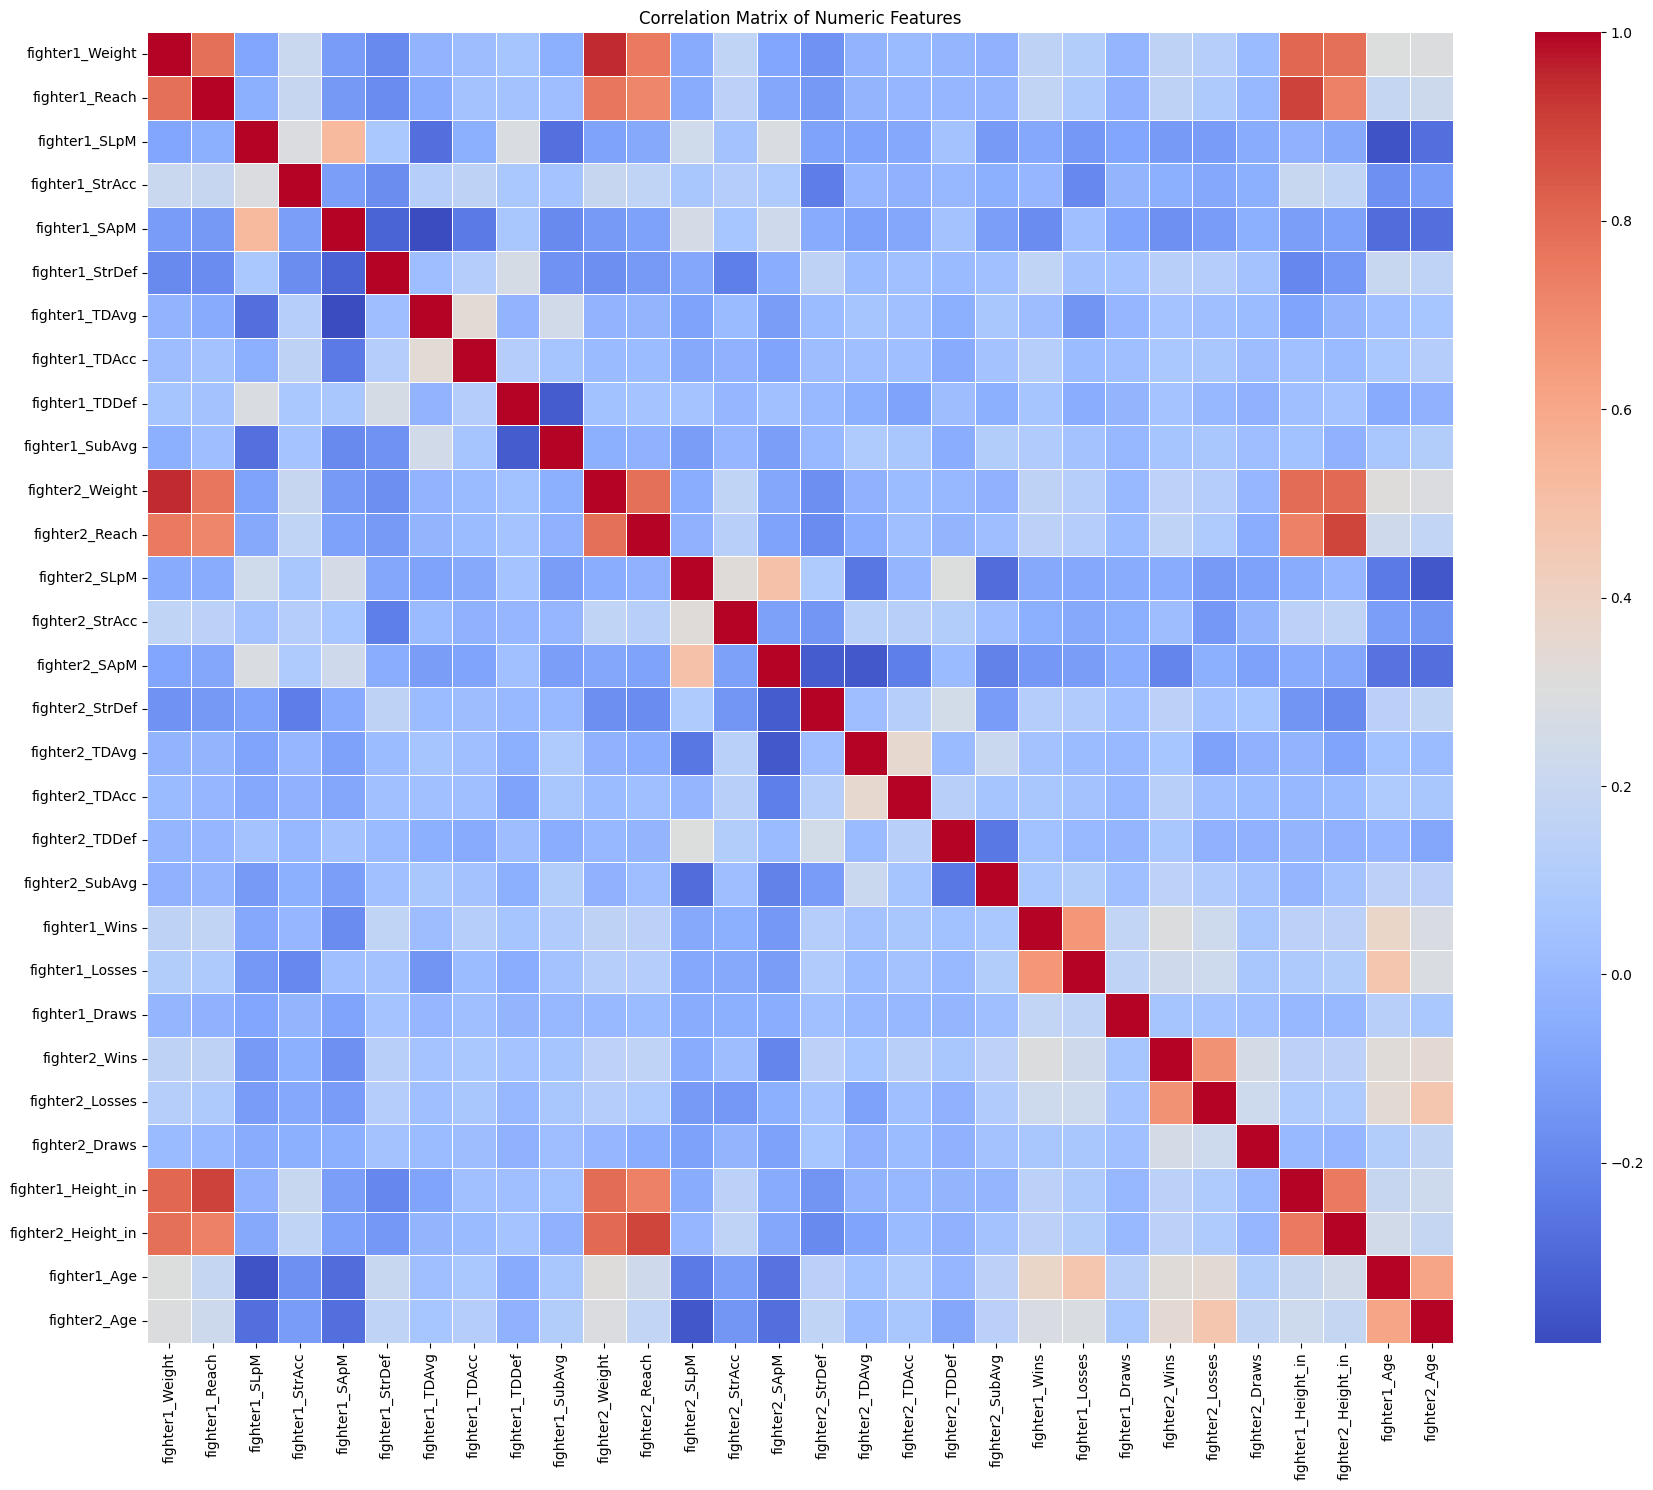


Highly Correlated Feature Pairs (abs > 0.7):
fighter1_Weight     fighter2_Weight       0.948935
fighter1_Reach      fighter1_Height_in    0.899060
fighter2_Height_in  fighter2_Reach        0.896343
fighter1_Weight     fighter1_Height_in    0.808960
fighter2_Weight     fighter2_Height_in    0.803937
fighter1_Height_in  fighter2_Weight       0.788835
fighter1_Weight     fighter2_Height_in    0.782336
fighter1_Reach      fighter1_Weight       0.782336
fighter2_Reach      fighter2_Weight       0.778970
fighter1_Reach      fighter2_Weight       0.761490
fighter1_Weight     fighter2_Reach        0.755374
fighter1_Height_in  fighter2_Height_in    0.754202
fighter2_Reach      fighter1_Height_in    0.732550
fighter2_Height_in  fighter1_Reach        0.729944
fighter2_Reach      fighter1_Reach        0.712377
dtype: float64


In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
if not df[numeric_cols].empty:
    correlation_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(18, 15))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()
    plt.close()
  # Print highly correlated pairs (threshold: > 0.7 or < -0.7)
    print("\nHighly Correlated Feature Pairs (abs > 0.7):")
    corr_pairs = correlation_matrix.unstack()
    sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
    strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.7]
    strong_pairs = strong_pairs[strong_pairs != 1.0]  # Remove self-correlation
    print(strong_pairs.drop_duplicates())

We also need to check if there are missing values


In [12]:
def check_missing_values(df):
    """Check for missing values in the dataset."""
    print("\n===== MISSING VALUES =====")
    missing_values = df.isnull().sum()
    missing_percent = (df.isnull().sum() / df.shape[0]) * 100
    missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
    print(missing_df[missing_df['Missing Values'] > 0])

check_missing_values(df)


===== MISSING VALUES =====
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


### Encoding the Target Column

Encoding the target column is necessary because the machine learning model don't comprehend categorical values, so we need to exchange 'fighter1' and 'fighter2' for something that the model can understand better like 0 and 1.

In [13]:
df['target'] = df['fight_outcome'].apply(lambda x: 1 if x == 'fighter1' else (0 if x == 'fighter2' else np.nan))
df = df.dropna(subset=['target'])
print(df['target'])
y = df['target']

0       0
1       0
2       1
3       1
4       0
       ..
6850    0
6851    0
6852    1
6853    0
6854    1
Name: target, Length: 6855, dtype: int64


### One-Hot Encoding

The Fighter Stance columns have string values, which is a problem. To solve this issue, we perform one-hot encoding, swapping the stance columns with different columns with binary values (0 or 1) for each possible value of stance

In [14]:
print(df['fighter1_Stance'])

0         Switch
1       Orthodox
2       Orthodox
3         Switch
4       Orthodox
          ...   
6850    Orthodox
6851    Southpaw
6852    Orthodox
6853    Orthodox
6854    Orthodox
Name: fighter1_Stance, Length: 6855, dtype: object


In [15]:
df = pd.get_dummies(df, columns=['fighter1_Stance', 'fighter2_Stance'])

stance_cols = [col for col in df.columns if col.startswith('fighter1_Stance_') or col.startswith('fighter2_Stance_')]

In [16]:
print(stance_cols)

['fighter1_Stance_Open Stance', 'fighter1_Stance_Orthodox', 'fighter1_Stance_Southpaw', 'fighter1_Stance_Switch', 'fighter2_Stance_Open Stance', 'fighter2_Stance_Orthodox', 'fighter2_Stance_Southpaw', 'fighter2_Stance_Switch']


As we can see above, the different new columns refering to the different stances will replace the original fighter_Stance columns

### Feature Definition

Before creating the models, we need to identify which columns are important to predict which fighter won the combat. The following columns will be used:

In [17]:
feature_cols = ['fighter1_Weight', 'fighter1_Reach','fighter1_SLpM','fighter1_StrAcc','fighter1_SApM',
                    'fighter1_StrDef','fighter1_TDAvg','fighter1_TDAcc','fighter1_TDDef','fighter1_SubAvg',
                    'fighter2_Weight','fighter2_Reach','fighter2_SLpM','fighter2_StrAcc',
                    'fighter2_SApM','fighter2_StrDef','fighter2_TDAvg','fighter2_TDAcc','fighter2_TDDef',
                    'fighter2_SubAvg','fighter1_Wins','fighter1_Losses','fighter1_Draws','fighter2_Wins',
                    'fighter2_Losses','fighter2_Draws','fighter1_Height_in','fighter2_Height_in','fighter1_Age',
                    'fighter2_Age']

X = df[feature_cols + stance_cols]
X = X.fillna(X.median())

### Data Split

Before creating the AI model, we need to split the data in training sets, and testing sets.

The training data set will be used to train the model. The testing data set contains data that the model has never "seen" and will be used to evaluate the model

In [18]:
test_size=0.1
random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


The test size is the amount of data that is gonna be used for testing
In this case 0.1 means that 10% of data is used for testing and 90% is used for training

## Model Creation and Training

When we have the data ready, we can create and train the AI model

Here, we create and train a Decision Tree model:

In [19]:
model = DecisionTreeClassifier(random_state=random_state)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Generic model creation method:

In [20]:
def create_model(type, df, test_size, neighbors, n_estimators=100, c_value=1.0, random_state=42):
    # Features: relevant columns of the data
    feature_cols = ['fighter1_Weight', 'fighter1_Reach','fighter1_SLpM','fighter1_StrAcc','fighter1_SApM',
                    'fighter1_StrDef','fighter1_TDAvg','fighter1_TDAcc','fighter1_TDDef','fighter1_SubAvg',
                    'fighter2_Weight','fighter2_Reach','fighter2_SLpM','fighter2_StrAcc',
                    'fighter2_SApM','fighter2_StrDef','fighter2_TDAvg','fighter2_TDAcc','fighter2_TDDef',
                    'fighter2_SubAvg','fighter1_Wins','fighter1_Losses','fighter1_Draws','fighter2_Wins',
                    'fighter2_Losses','fighter2_Draws','fighter1_Height_in','fighter2_Height_in','fighter1_Age',
                    'fighter2_Age']

    df = df.copy()
    df = pd.get_dummies(df, columns=['fighter1_Stance', 'fighter2_Stance'])

    df['target'] = df['fight_outcome'].apply(lambda x: 1 if x == 'fighter1' else (0 if x == 'fighter2' else np.nan))
    df = df.dropna(subset=['target'])

    stance_cols = [col for col in df.columns if col.startswith('fighter1_Stance_') or col.startswith('fighter2_Stance_')]

    X = df[feature_cols + stance_cols]
    y = df['target']

    X = X.fillna(X.median())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    if(type == "decisionTree"):
        model = DecisionTreeClassifier(random_state=random_state)
    elif(type == "K-nearestNeighbors"):
        model = KNeighborsClassifier(neighbors)
    elif(type == "randomForest"):
        model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    if type == "gradientBoosting":
        model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=random_state)

    if type == "stacking":
        estimators = [
            ('rf', RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)),
            ('knn', KNeighborsClassifier(neighbors)),
            ('dt', DecisionTreeClassifier())
        ]
        final_estimator = GradientBoostingClassifier(n_estimators=n_estimators, random_state=random_state)
        model = StackingClassifier(estimators=estimators, final_estimator=final_estimator, passthrough=True)

    elif(type == "svm"):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        model = SVC(C=c_value, kernel='rbf', random_state=random_state, probability=True)
        model.fit(X_train, y_train)
        return model, X_test, y_test, scaler

    model.fit(X_train, y_train)
    return model, X_test, y_test


## Model Testing and Evaluation

After creating the model, we use the testing data set to test the model.
After testing, we compare the predictions with the real values and evaluate the model following the metrics:
- Testing and Training time
- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix

In [21]:
start = time.time()
y_pred = model.predict(X_test)
end = time.time()

In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
t = end - start
cm = confusion_matrix(y_test, y_pred)

### Metrics obtained:

In [23]:
print(accuracy)
print(precision)
print(recall)
print(f1)
print(t)
print(cm)

0.6443148688046647
0.7103448275862069
0.7236533957845434
0.7169373549883991
0.006498098373413086
[[133 126]
 [118 309]]


### Confusion Matrix Plot obtained:

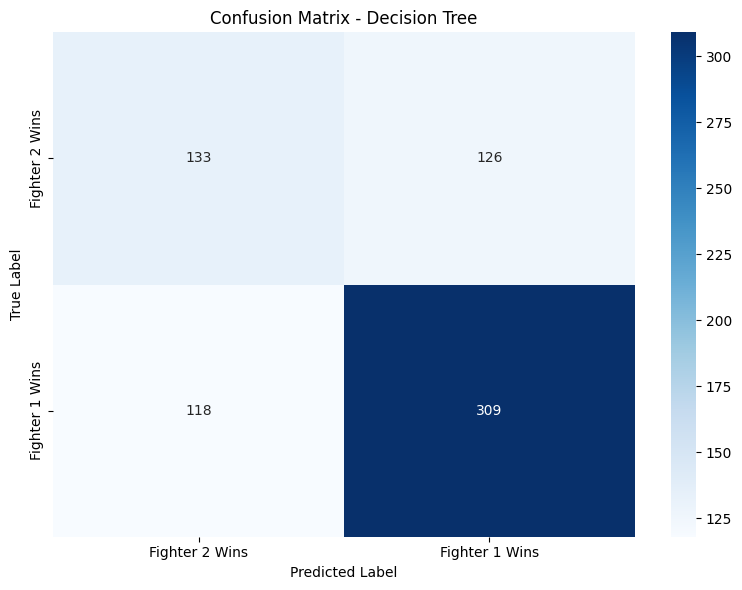

In [24]:
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fighter 2 Wins', 'Fighter 1 Wins'],
                yticklabels=['Fighter 2 Wins', 'Fighter 1 Wins'])
    plt.title(f'Confusion Matrix - Decision Tree')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    plt.close()

Generic model creation method:

In [25]:

def test_model(model, X_test, y_test):
    start = time.time()
    y_pred = model.predict(X_test)
    end = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    t = end - start
    return accuracy, precision, recall, f1, t, y_pred

## Model Comparison

To aid our task of comparing the models, here are methods that create plots and graphs

In [26]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    """Plot confusion matrix for a model."""
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fighter 2 Wins', 'Fighter 1 Wins'],
                yticklabels=['Fighter 2 Wins', 'Fighter 1 Wins'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    plt.close()

def plot_roc_curve(model, X_test, y_test, model_name):
    """Plot ROC curve for a model."""
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(X_test)
        else:
            print(f"Cannot generate ROC curve for {model_name}: model doesn't support probability prediction")
            return

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.close()

        return roc_auc
    except Exception as e:
        print(f"Error generating ROC curve for {model_name}: {e}")
        return None

def plot_learning_curve(estimator, X, y, title, cv=5):
    """Plot learning curve for a model."""
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        random_state=42)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.title(f'Learning Curve - {title}')
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.close()

def evaluate_with_cv(model, X, y, cv=5):
    """Evaluate model with cross-validation."""
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return cv_scores.mean(), cv_scores.std()

def make_graph_decision_tree(measure, xAxis, yAxis):
    """Create a graph showing the effect of test size proportion on model performance."""
    plt.figure(figsize=(8, 8))
    plt.plot(xAxis, yAxis, marker='o', linestyle='-', color='b')
    plt.title(f'Effects of training data size in {measure}')
    plt.xlabel('Percentage of Data used for Testing')
    plt.ylabel(f'{measure}')
    plt.grid(True)
    plt.xticks(xAxis)

    plt.ylim(max(min(yAxis)-0.05, 0), max(yAxis) + 0.05)
    plt.show()
    plt.close()

def make_graph_k_neighbors(measure, xAxis, yAxis):
    """Create a graph showing the effect of number of neighbors on model performance."""
    plt.figure(figsize=(8, 8))
    plt.plot(xAxis, yAxis, marker='o', linestyle='-', color='b')
    plt.title(f'Effects of number of neighbors in {measure}')
    plt.xlabel('Number of Neighbors')
    plt.ylabel(f'{measure}')
    plt.grid(True)
    plt.xticks(xAxis)

    plt.ylim(max(min(yAxis)-0.05, 0), max(yAxis) + 0.05)
    plt.show()
    plt.close()

def make_graph_models(measure, models, yAxis):
    """Create a graph comparing different models."""
    plt.figure(figsize=(8, 8))
    plt.bar(models, yAxis, color='b')
    plt.title(f'Comparison between models: {measure}')
    plt.xlabel('Model')
    plt.ylabel(f'{measure}')
    plt.grid(True, axis='y')
    plt.xticks(rotation=45)

    plt.ylim(max(min(yAxis)-0.05, 0), max(yAxis) + 0.05)
    plt.tight_layout()
    plt.show()
    plt.close()

def make_graph_random_forest(measure, xAxis, yAxis):
    """Create a graph showing the effect of number of estimators on RF performance."""
    plt.figure(figsize=(8, 8))
    plt.plot(xAxis, yAxis, marker='o', linestyle='-', color='g')
    plt.title(f'Effects of number of estimators in {measure}')
    plt.xlabel('Number of Estimators')
    plt.ylabel(f'{measure}')
    plt.grid(True)
    plt.xticks(xAxis)

    plt.ylim(max(min(yAxis)-0.05, 0), max(yAxis) + 0.05)
    plt.show()
    plt.close()

def make_graph_svm(measure, xAxis, yAxis):
    """Create a graph showing the effect of C parameter on SVM performance."""
    plt.figure(figsize=(8, 8))
    plt.plot(xAxis, yAxis, marker='o', linestyle='-', color='r')
    plt.title(f'Effects of C parameter in {measure} (SVM)')
    plt.xlabel('C Parameter Value')
    plt.ylabel(f'{measure}')
    plt.xscale('log')
    plt.grid(True)

    plt.ylim(max(min(yAxis)-0.05, 0), max(yAxis) + 0.05)
    plt.show()
    plt.close()

def make_graph_gradient_boost(measure, xAxis, yAxis):
    """Create a graph showing the effect of number of estimators on RF performance."""
    plt.figure(figsize=(8, 8))
    plt.plot(xAxis, yAxis, marker='o', linestyle='-', color='b')
    plt.title(f'Efeitos do número de estimadores em {measure}')
    plt.xlabel('Número de Estimadores')
    plt.ylabel(f'{measure}')
    plt.grid(True)
    plt.xticks(xAxis)

    plt.ylim(max(min(yAxis)-0.05, 0), max(yAxis) + 0.05)
    plt.show()


def make_graph_stacking(measure, xAxis, yAxis):
    """Create a graph showing the effect of number of estimators on RF performance."""
    plt.figure(figsize=(8, 8))
    plt.plot(xAxis, yAxis, marker='o', linestyle='-', color='b')
    plt.title(f'Efeitos do número de estimadores em {measure}')
    plt.xlabel('Número de Estimadores')
    plt.ylabel(f'{measure}')
    plt.grid(True)
    plt.xticks(xAxis)

    plt.ylim(max(min(yAxis)-0.05, 0), max(yAxis) + 0.05)
    plt.show()

### Decision Trees comparison

The following method evaluates this type of model and generates graphs for a better understanding of the characteristics of it.

Although obvious, we measured the metrics for different testing and training sizes to observe how they change when increasing the amount of data used for training

In [27]:
def compare_decision_tree(df):
    accuracy = []
    precision = []
    recall = []
    f1 = []
    train_time = []
    test_time = []
    cv_scores = []

    for i in range(9, 0, -1):
        start = time.time()
        model, X_test, y_test = create_model("decisionTree", df, i/10, 0)
        end = time.time()
        train_time += [end-start]
        acc, prec, rec, f1_, time_, y_pred = test_model(model, X_test, y_test)
        accuracy += [acc]
        precision += [prec]
        recall += [rec]
        f1 += [f1_]
        test_time += [time_]

        # Cross-validation
        feature_cols = ['fighter1_Weight', 'fighter1_Reach','fighter1_SLpM','fighter1_StrAcc','fighter1_SApM',
                        'fighter1_StrDef','fighter1_TDAvg','fighter1_TDAcc','fighter1_TDDef','fighter1_SubAvg',
                        'fighter2_Weight','fighter2_Reach','fighter2_SLpM','fighter2_StrAcc',
                        'fighter2_SApM','fighter2_StrDef','fighter2_TDAvg','fighter2_TDAcc','fighter2_TDDef',
                        'fighter2_SubAvg','fighter1_Wins','fighter1_Losses','fighter1_Draws','fighter2_Wins',
                        'fighter2_Losses','fighter2_Draws','fighter1_Height_in','fighter2_Height_in','fighter1_Age',
                        'fighter2_Age']

        df_temp = df.copy()
        df_temp = pd.get_dummies(df_temp, columns=['fighter1_Stance', 'fighter2_Stance'])
        df_temp['target'] = df_temp['fight_outcome'].apply(lambda x: 1 if x == 'fighter1' else (0 if x == 'fighter2' else np.nan))
        df_temp = df_temp.dropna(subset=['target'])

        stance_cols = [col for col in df_temp.columns if col.startswith('fighter1_Stance_') or col.startswith('fighter2_Stance_')]
        X_full = df_temp[feature_cols + stance_cols].fillna(df_temp[feature_cols + stance_cols].median())
        y_full = df_temp['target']

        cv_mean, cv_std = evaluate_with_cv(DecisionTreeClassifier(random_state=42), X_full, y_full)
        cv_scores.append(cv_mean)

        # Generate confusion matrix for the best test size (smallest one)
        if i == 1:
            plot_confusion_matrix(y_test, y_pred, "Decision Tree")
            plot_roc_curve(model, X_test, y_test, "Decision Tree")
            plot_learning_curve(DecisionTreeClassifier(random_state=42), X_full, y_full, "Decision Tree")

    train_sizes = [x/10 for x in range(9,0,-1)]

    make_graph_decision_tree("Accuracy", train_sizes, accuracy)
    make_graph_decision_tree("Precision", train_sizes, precision)
    make_graph_decision_tree("Recall", train_sizes, recall)
    make_graph_decision_tree("F1 Score", train_sizes, f1)
    make_graph_decision_tree("CV Score", train_sizes, cv_scores)
    make_graph_decision_tree("Training Time", train_sizes, train_time)
    make_graph_decision_tree("Testing Time", train_sizes, test_time)

Loading dataset from assets/clean_ufc_all_fights.csv...
Dataset loaded. Shape: (6855, 37)


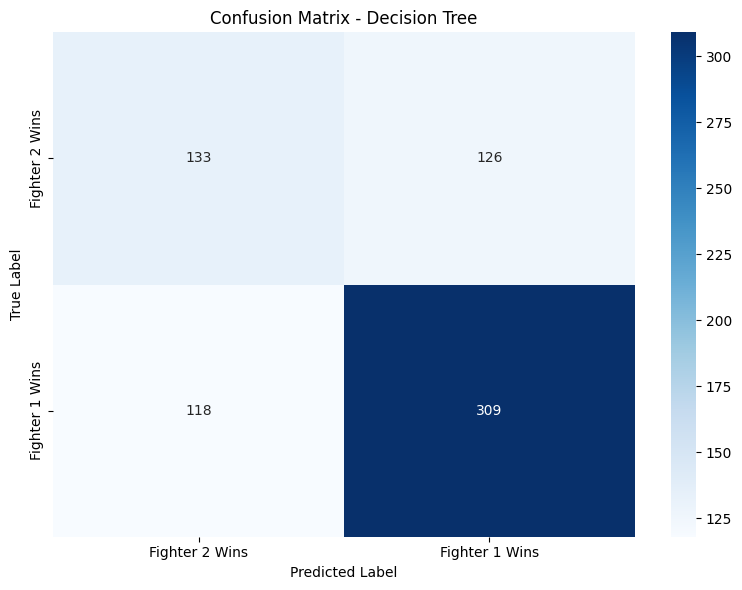

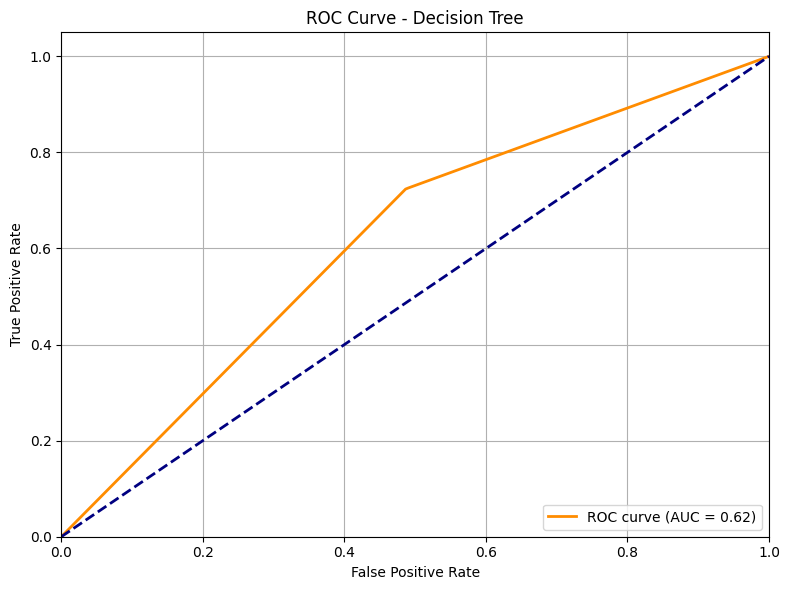

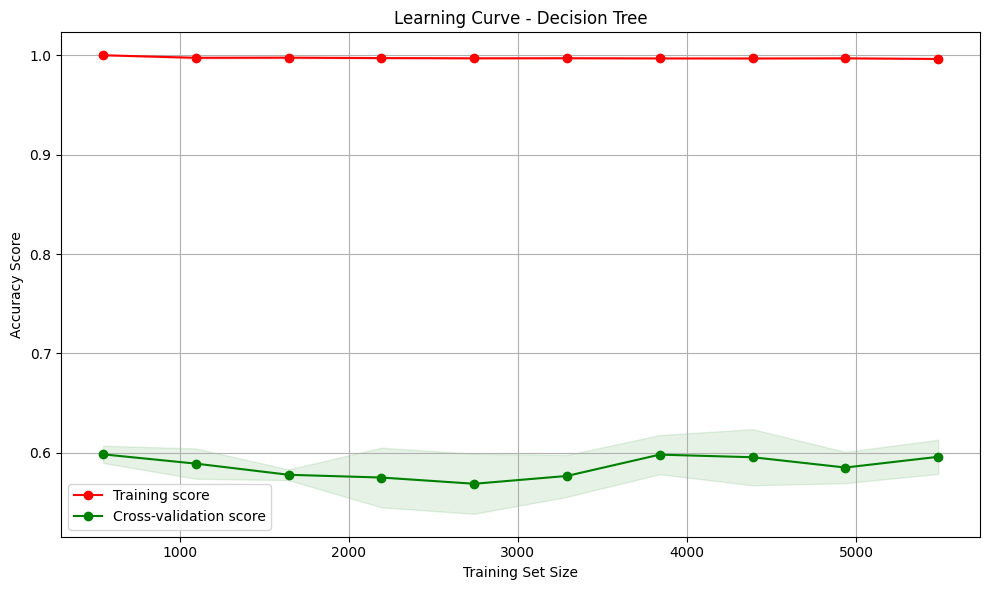

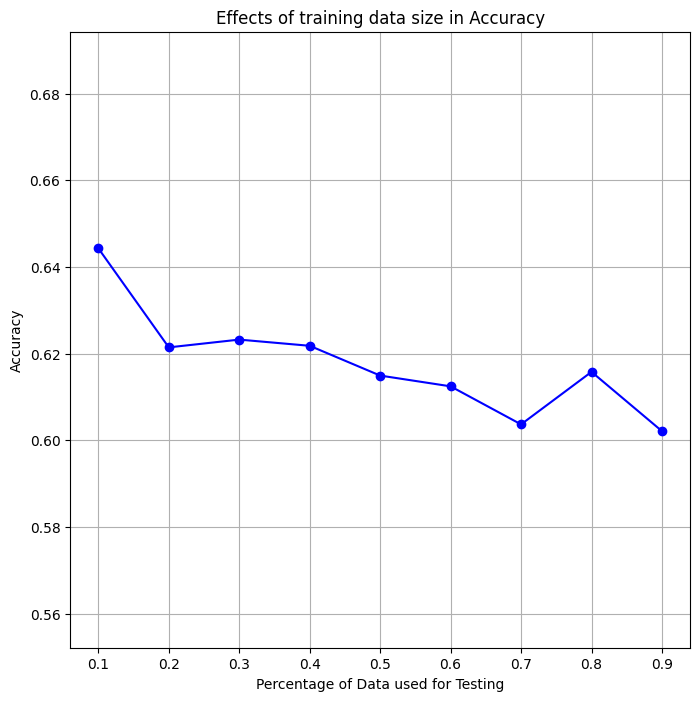

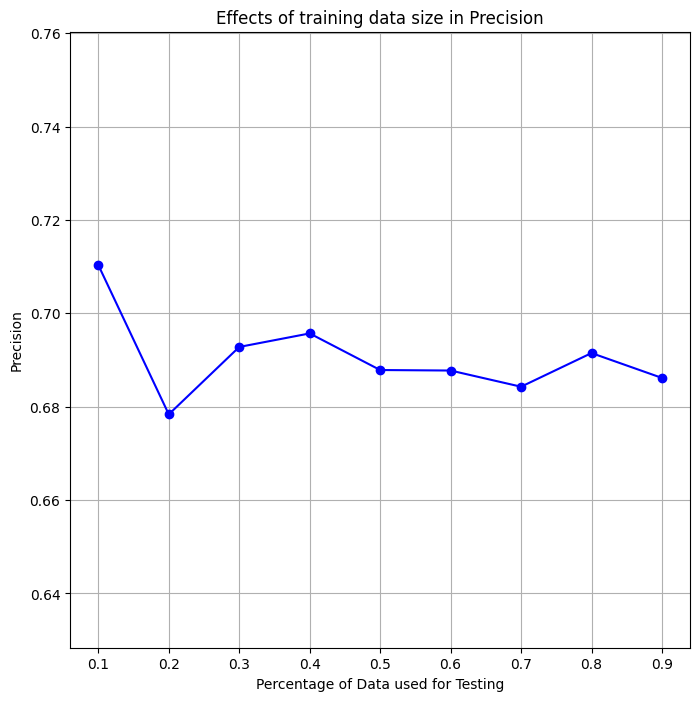

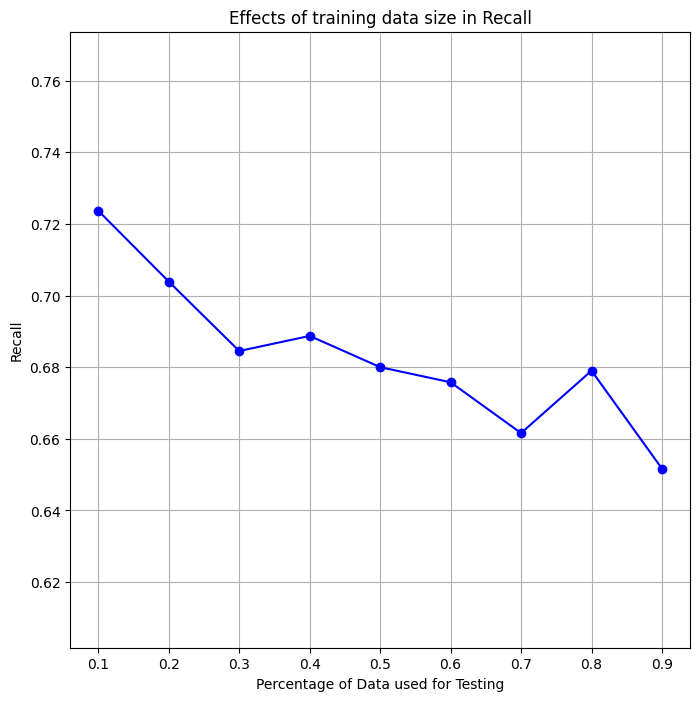

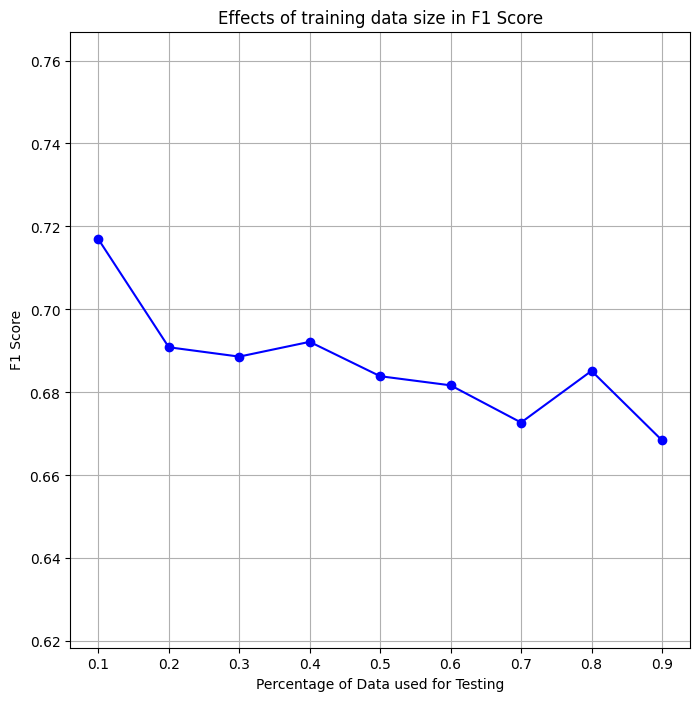

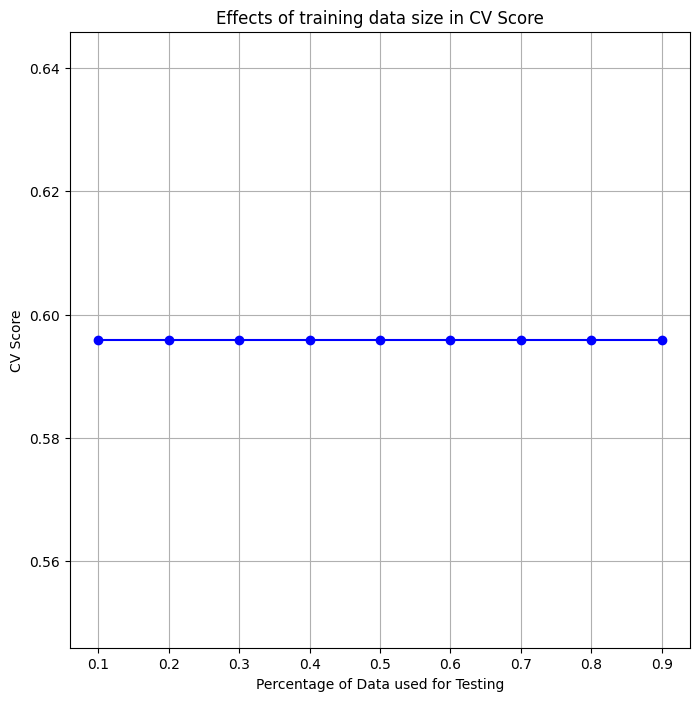

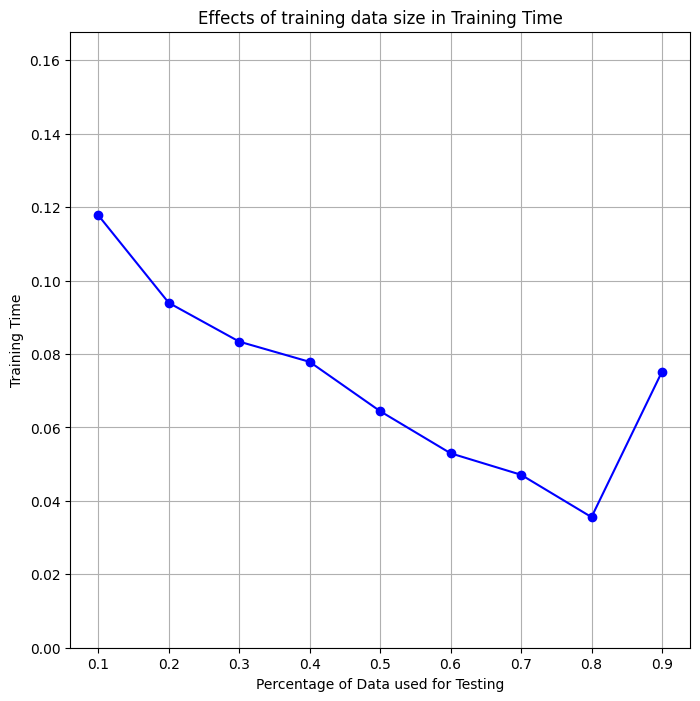

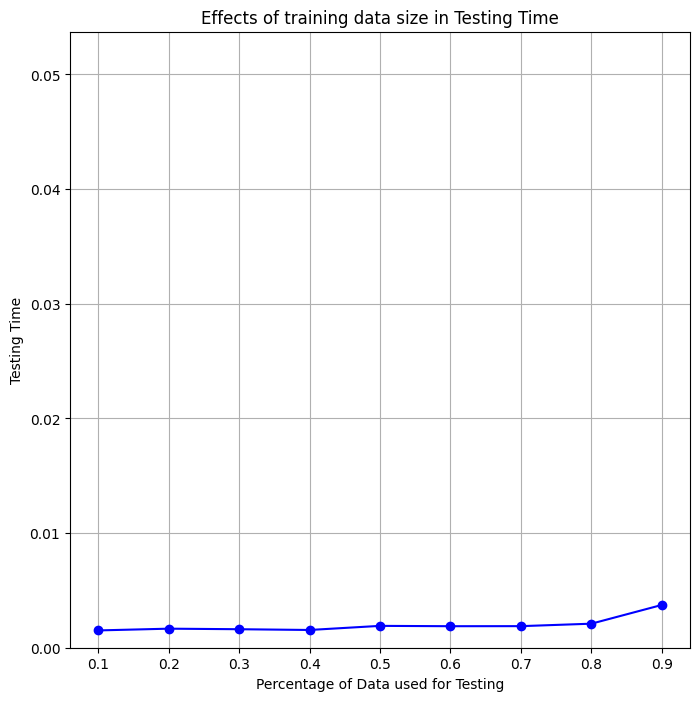

In [29]:
df = load_data('assets/clean_ufc_all_fights.csv')
compare_decision_tree(df)

### KNN Comparison

We decided to test the K-Nearest Neighbors type of model.

Aswell as the Decision trees, we evaluated the different metrics using this model and observed the effects of the different number of neighbors

In [33]:
def compare_k_nearest_neighbors(df):
    """Compare performance of K-Nearest Neighbors models with different numbers of neighbors."""
    accuracy = []
    precision = []
    recall = []
    f1 = []
    train_time = []
    test_time = []
    cv_scores = []

    # Prepare data once for cross-validation
    feature_cols = ['fighter1_Weight', 'fighter1_Reach','fighter1_SLpM','fighter1_StrAcc','fighter1_SApM',
                    'fighter1_StrDef','fighter1_TDAvg','fighter1_TDAcc','fighter1_TDDef','fighter1_SubAvg',
                    'fighter2_Weight','fighter2_Reach','fighter2_SLpM','fighter2_StrAcc',
                    'fighter2_SApM','fighter2_StrDef','fighter2_TDAvg','fighter2_TDAcc','fighter2_TDDef',
                    'fighter2_SubAvg','fighter1_Wins','fighter1_Losses','fighter1_Draws','fighter2_Wins',
                    'fighter2_Losses','fighter2_Draws','fighter1_Height_in','fighter2_Height_in','fighter1_Age',
                    'fighter2_Age']

    df_temp = df.copy()
    df_temp = pd.get_dummies(df_temp, columns=['fighter1_Stance', 'fighter2_Stance'])
    df_temp['target'] = df_temp['fight_outcome'].apply(lambda x: 1 if x == 'fighter1' else (0 if x == 'fighter2' else np.nan))
    df_temp = df_temp.dropna(subset=['target'])

    stance_cols = [col for col in df_temp.columns if col.startswith('fighter1_Stance_') or col.startswith('fighter2_Stance_')]
    X_full = df_temp[feature_cols + stance_cols].fillna(df_temp[feature_cols + stance_cols].median())
    y_full = df_temp['target']

    best_k = 0
    best_accuracy = 0
    best_model_data = None

    for i in range(1, 31, 1):
        start = time.time()
        model, X_test, y_test = create_model("K-nearestNeighbors", df, 0.1, i)
        end = time.time()
        train_time += [end-start]
        acc, prec, rec, f1_, time_, y_pred = test_model(model, X_test, y_test)
        accuracy += [acc]
        precision += [prec]
        recall += [rec]
        f1 += [f1_]
        test_time += [time_]

        # Cross-validation
        cv_mean, cv_std = evaluate_with_cv(KNeighborsClassifier(i), X_full, y_full)
        cv_scores.append(cv_mean)

        # Track best model
        if acc > best_accuracy:
            best_accuracy = acc
            best_k = i
            best_model_data = (model, X_test, y_test, y_pred)

    num_neigs = [x for x in range(1,31,1)]

    # Generate confusion matrix and ROC curve for best k
    if best_model_data:
        model, X_test, y_test, y_pred = best_model_data
        plot_confusion_matrix(y_test, y_pred, f"KNN (k={best_k})")
        plot_roc_curve(model, X_test, y_test, f"KNN (k={best_k})")
        plot_learning_curve(KNeighborsClassifier(best_k), X_full, y_full, f"KNN (k={best_k})")

    best_k_idx = np.argmax(accuracy)
    print(f"\nBest K value found: {best_k_idx + 1}")
    print(f"Maximum accuracy: {accuracy[best_k_idx]:.4f}")
    print(f"Precision: {precision[best_k_idx]:.4f}")
    print(f"Recall: {recall[best_k_idx]:.4f}")
    print(f"F1 Score: {f1[best_k_idx]:.4f}")

    make_graph_k_neighbors("Accuracy", num_neigs, accuracy)
    make_graph_k_neighbors("Precision", num_neigs, precision)
    make_graph_k_neighbors("Recall", num_neigs, recall)
    make_graph_k_neighbors("F1 Score", num_neigs, f1)
    make_graph_k_neighbors("CV Score", num_neigs, cv_scores)
    make_graph_k_neighbors("Training Time", num_neigs, train_time)
    make_graph_k_neighbors("Testing Time", num_neigs, test_time)

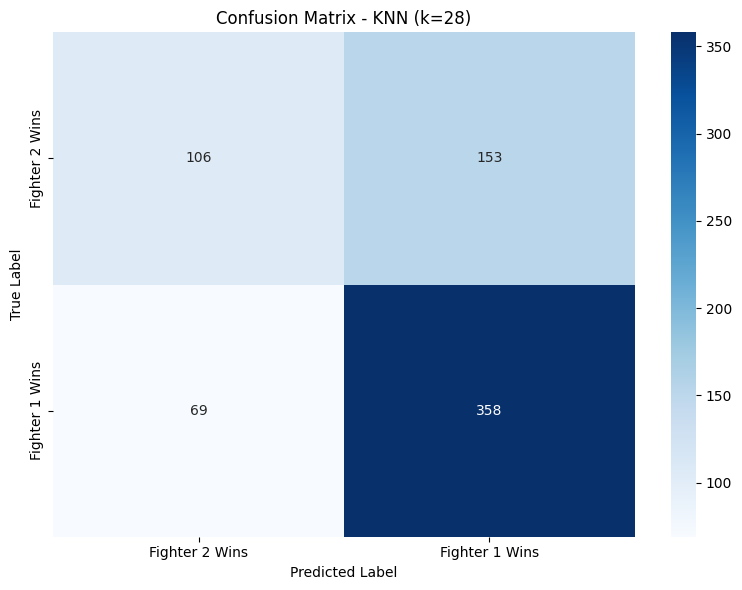

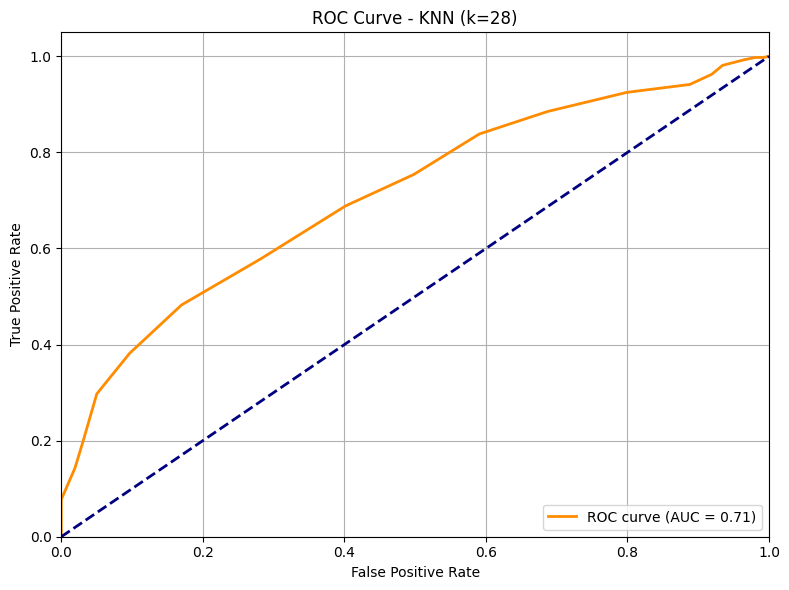

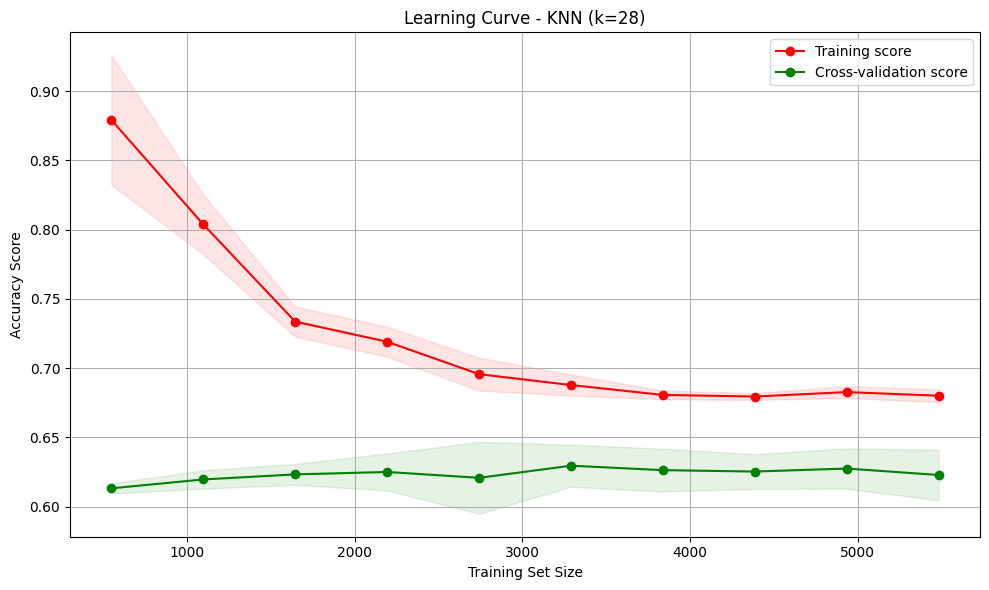


Best K value found: 28
Maximum accuracy: 0.6764
Precision: 0.7006
Recall: 0.8384
F1 Score: 0.7633


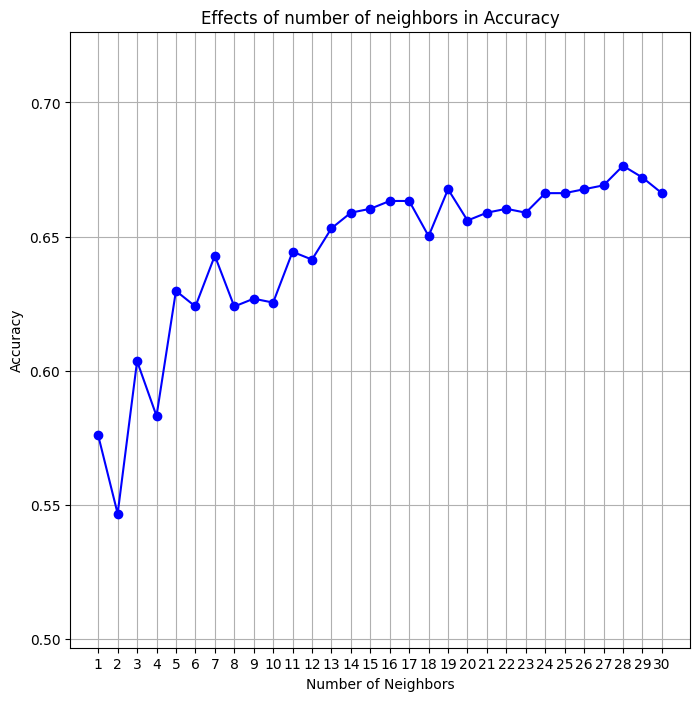

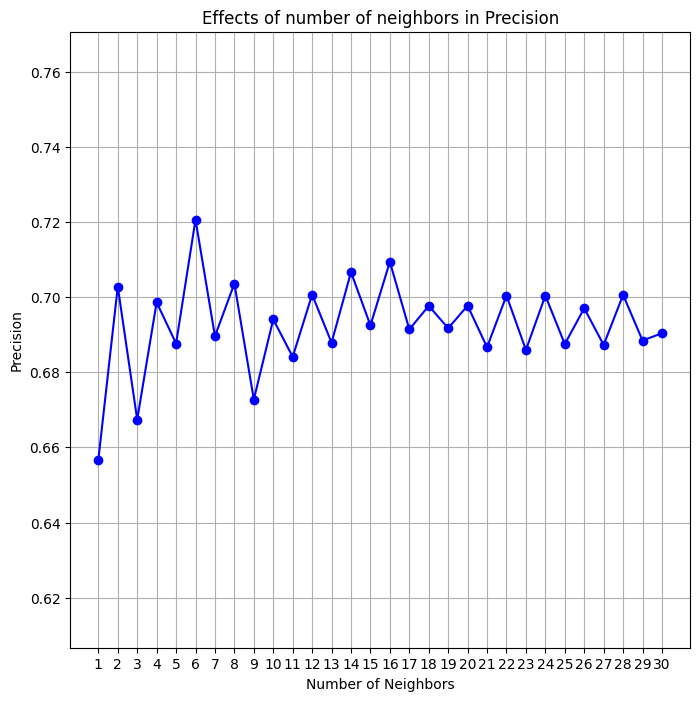

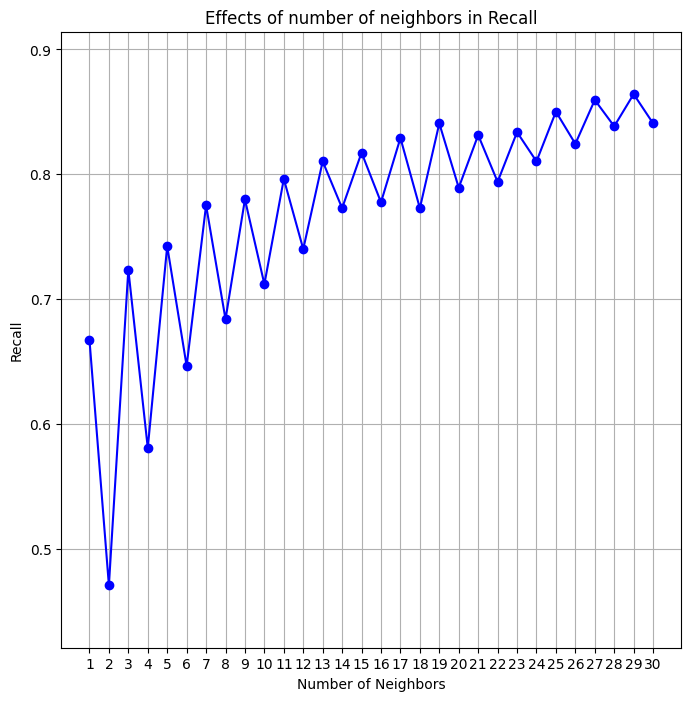

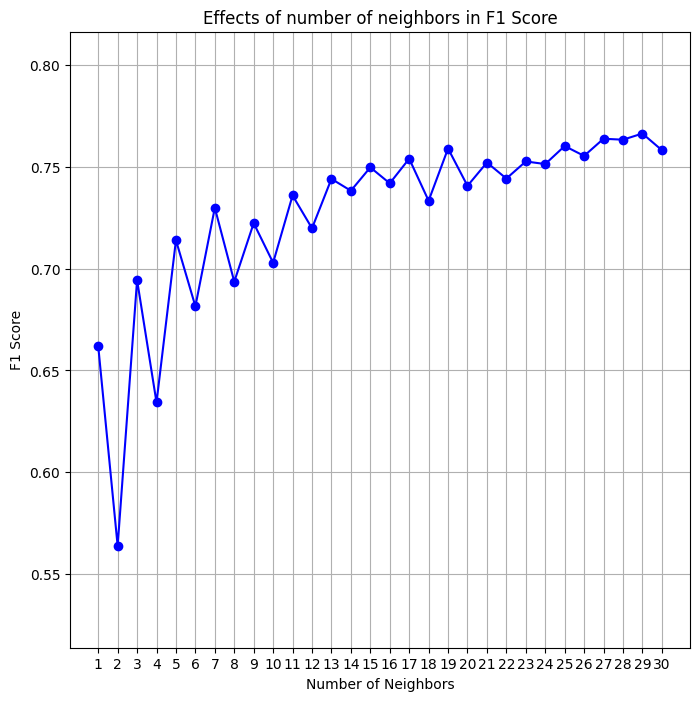

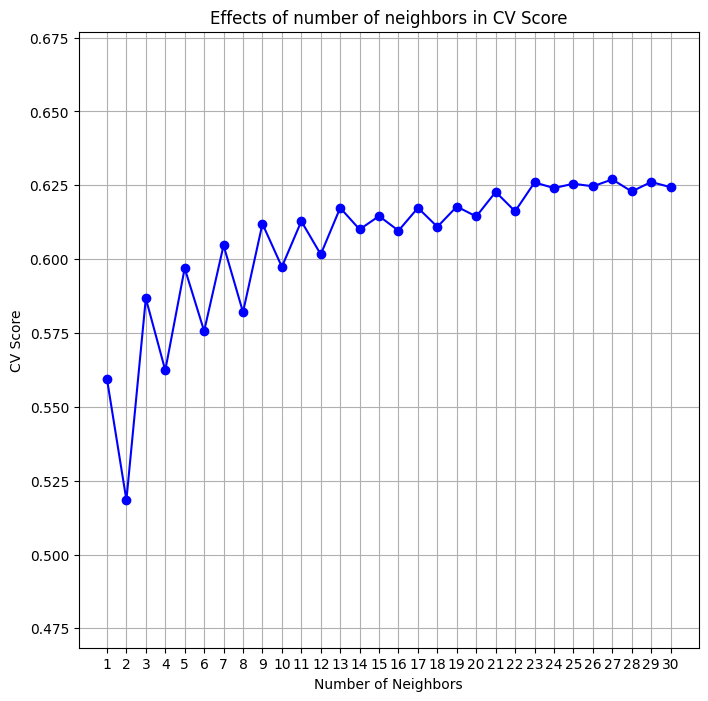

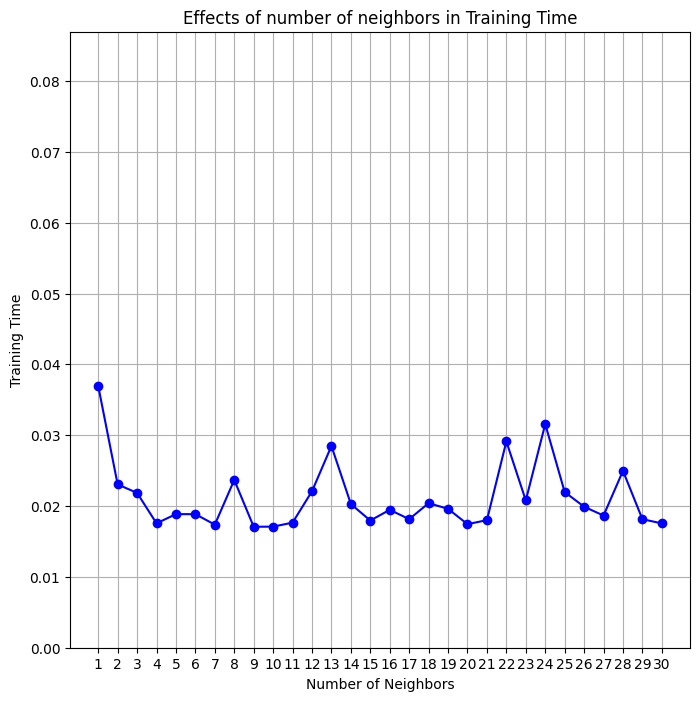

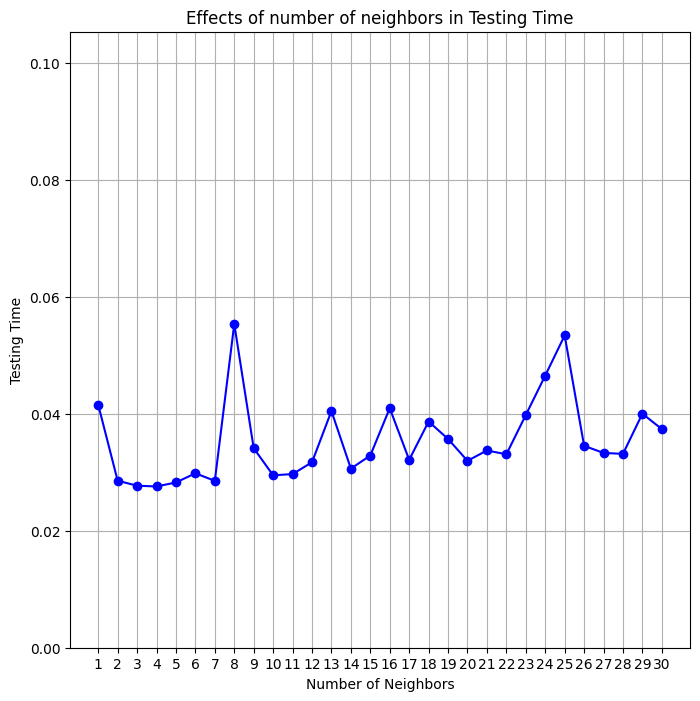

In [34]:
compare_k_nearest_neighbors(df)

### SVM Comparison

The following code performs the evaluation of the Support Vector Machine models, aswell as observe the effects of the C parameter in the metrics

In [35]:
def compare_svm(df):
    """Compare SVM performance with different C values."""
    accuracy = []
    precision = []
    recall = []
    f1 = []
    train_time = []
    test_time = []
    cv_scores = []
    c_values = [0.1, 0.5, 1, 5, 10, 100]

    # Prepare data for cross-validation
    feature_cols = ['fighter1_Weight', 'fighter1_Reach','fighter1_SLpM','fighter1_StrAcc','fighter1_SApM',
                    'fighter1_StrDef','fighter1_TDAvg','fighter1_TDAcc','fighter1_TDDef','fighter1_SubAvg',
                    'fighter2_Weight','fighter2_Reach','fighter2_SLpM','fighter2_StrAcc',
                    'fighter2_SApM','fighter2_StrDef','fighter2_TDAvg','fighter2_TDAcc','fighter2_TDDef',
                    'fighter2_SubAvg','fighter1_Wins','fighter1_Losses','fighter1_Draws','fighter2_Wins',
                    'fighter2_Losses','fighter2_Draws','fighter1_Height_in','fighter2_Height_in','fighter1_Age',
                    'fighter2_Age']

    df_temp = df.copy()
    df_temp = pd.get_dummies(df_temp, columns=['fighter1_Stance', 'fighter2_Stance'])
    df_temp['target'] = df_temp['fight_outcome'].apply(lambda x: 1 if x == 'fighter1' else (0 if x == 'fighter2' else np.nan))
    df_temp = df_temp.dropna(subset=['target'])

    stance_cols = [col for col in df_temp.columns if col.startswith('fighter1_Stance_') or col.startswith('fighter2_Stance_')]
    X_full = df_temp[feature_cols + stance_cols].fillna(df_temp[feature_cols + stance_cols].median())
    y_full = df_temp['target']

    best_c = 0
    best_accuracy = 0
    best_model_data = None

    for c in c_values:
        start = time.time()
        result = create_model("svm", df, 0.1, 0, c_value=c)
        if len(result) == 4:
            model, X_test, y_test, scaler = result
        else:
            model, X_test, y_test = result
        end = time.time()
        train_time += [end-start]
        acc, prec, rec, f1_, time_, y_pred = test_model(model, X_test, y_test)
        accuracy += [acc]
        precision += [prec]
        recall += [rec]
        f1 += [f1_]
        test_time += [time_]

        # Cross-validation with scaling
        scaler_cv = StandardScaler()
        X_full_scaled = scaler_cv.fit_transform(X_full)
        cv_mean, cv_std = evaluate_with_cv(SVC(C=c, kernel='rbf', random_state=42), X_full_scaled, y_full)
        cv_scores.append(cv_mean)

        # Track best model
        if acc > best_accuracy:
            best_accuracy = acc
            best_c = c
            best_model_data = (model, X_test, y_test, y_pred)

    # Generate confusion matrix and ROC curve for best C
    if best_model_data:
        model, X_test, y_test, y_pred = best_model_data
        plot_confusion_matrix(y_test, y_pred, f"SVM (C={best_c})")
        plot_roc_curve(model, X_test, y_test, f"SVM (C={best_c})")

        # For learning curve, we need to create a pipeline with scaling
        from sklearn.pipeline import Pipeline
        svm_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', SVC(C=best_c, kernel='rbf', random_state=42))
        ])
        plot_learning_curve(svm_pipeline, X_full, y_full, f"SVM (C={best_c})")

    best_c_idx = np.argmax(accuracy)
    print(f"\nBest C value: {c_values[best_c_idx]}")
    print(f"Maximum accuracy: {accuracy[best_c_idx]:.4f}")
    print(f"Precision: {precision[best_c_idx]:.4f}")
    print(f"Recall: {recall[best_c_idx]:.4f}")
    print(f"F1 Score: {f1[best_c_idx]:.4f}")

    make_graph_svm("Accuracy", c_values, accuracy)
    make_graph_svm("Precision", c_values, precision)
    make_graph_svm("Recall", c_values, recall)
    make_graph_svm("F1 Score", c_values, f1)
    make_graph_svm("CV Score", c_values, cv_scores)
    make_graph_svm("Training Time", c_values, train_time)
    make_graph_svm("Testing Time", c_values, test_time)

In [36]:
compare_svm(df)

KeyboardInterrupt: 

## Ensemble Comparison

Aswell as the different types of models, we implemented three ensembles.

An ensemble model is a machine learning technique where multiple models are combined to produce a better result than any individual model alone.


### Random Forest

In [ ]:
def compare_random_forest(df):
    accuracy = []
    precision = []
    recall = []
    f1 = []
    train_time = []
    test_time = []
    cv_scores = []
    n_estimators_values = [10, 50, 100, 150, 200]

    # Prepare data for cross-validation
    feature_cols = ['fighter1_Weight', 'fighter1_Reach','fighter1_SLpM','fighter1_StrAcc','fighter1_SApM',
                    'fighter1_StrDef','fighter1_TDAvg','fighter1_TDAcc','fighter1_TDDef','fighter1_SubAvg',
                    'fighter2_Weight','fighter2_Reach','fighter2_SLpM','fighter2_StrAcc',
                    'fighter2_SApM','fighter2_StrDef','fighter2_TDAvg','fighter2_TDAcc','fighter2_TDDef',
                    'fighter2_SubAvg','fighter1_Wins','fighter1_Losses','fighter1_Draws','fighter2_Wins',
                    'fighter2_Losses','fighter2_Draws','fighter1_Height_in','fighter2_Height_in','fighter1_Age',
                    'fighter2_Age']

    df_temp = df.copy()
    df_temp = pd.get_dummies(df_temp, columns=['fighter1_Stance', 'fighter2_Stance'])
    df_temp['target'] = df_temp['fight_outcome'].apply(lambda x: 1 if x == 'fighter1' else (0 if x == 'fighter2' else np.nan))
    df_temp = df_temp.dropna(subset=['target'])

    stance_cols = [col for col in df_temp.columns if col.startswith('fighter1_Stance_') or col.startswith('fighter2_Stance_')]
    X_full = df_temp[feature_cols + stance_cols].fillna(df_temp[feature_cols + stance_cols].median())
    y_full = df_temp['target']

    best_n = 0
    best_accuracy = 0
    best_model_data = None

    for n_estimators in n_estimators_values:
        start = time.time()
        model, X_test, y_test = create_model("randomForest", df, 0.1, 0, n_estimators=n_estimators)
        end = time.time()
        train_time += [end-start]
        acc, prec, rec, f1_, time_, y_pred = test_model(model, X_test, y_test)
        accuracy += [acc]
        precision += [prec]
        recall += [rec]
        f1 += [f1_]
        test_time += [time_]

        # Cross-validation
        cv_mean, cv_std = evaluate_with_cv(RandomForestClassifier(n_estimators=n_estimators, random_state=42), X_full, y_full)
        cv_scores.append(cv_mean)

        # Track best model
        if acc > best_accuracy:
            best_accuracy = acc
            best_n = n_estimators
            best_model_data = (model, X_test, y_test, y_pred)

    # Generate confusion matrix and ROC curve for best n_estimators
    if best_model_data:
        model, X_test, y_test, y_pred = best_model_data
        plot_confusion_matrix(y_test, y_pred, f"Random Forest (n={best_n})")
        plot_roc_curve(model, X_test, y_test, f"Random Forest (n={best_n})")
        plot_learning_curve(RandomForestClassifier(n_estimators=best_n, random_state=42), X_full, y_full, f"Random Forest (n={best_n})")


    best_n_idx = np.argmax(accuracy)
    print(f"\nBest number of estimators: {n_estimators_values[best_n_idx]}")
    print(f"Maximum accuracy: {accuracy[best_n_idx]:.4f}")
    print(f"Precision: {precision[best_n_idx]:.4f}")
    print(f"Recall: {recall[best_n_idx]:.4f}")
    print(f"F1 Score: {f1[best_n_idx]:.4f}")

    make_graph_random_forest("Accuracy", n_estimators_values, accuracy)
    make_graph_random_forest("Precision", n_estimators_values, precision)
    make_graph_random_forest("Recall", n_estimators_values, recall)
    make_graph_random_forest("F1 Score", n_estimators_values, f1)
    make_graph_random_forest("CV Score", n_estimators_values, cv_scores)
    make_graph_random_forest("Training Time", n_estimators_values, train_time)
    make_graph_random_forest("Testing Time", n_estimators_values, test_time)

In [ ]:
    compare_random_forest(df)

### Gradient Boosting

In [ ]:
def compare_gradient_boosting(df):
    accuracy, precision, recall, f1, train_time, test_time = [], [], [], [], [], []
    n_estimators_values = [10, 50, 100, 150, 200]

    for n_estimators in n_estimators_values:
        start = time.time()
        model, X_test, y_test = create_model("gradientBoosting", df, 0.1, 0, n_estimators=n_estimators)
        end = time.time()
        train_time.append(end - start)
        acc, prec, rec, f1_, time_, _ = test_model(model, X_test, y_test)
        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        f1.append(f1_)
        test_time.append(time_)

    # Create graphs
    make_graph_gradient_boost("Accuracy", n_estimators_values, accuracy)
    make_graph_gradient_boost("Precision", n_estimators_values, precision)
    make_graph_gradient_boost("Recall", n_estimators_values, recall)
    make_graph_gradient_boost("F1 Score", n_estimators_values, f1)
    make_graph_gradient_boost("Training Time", n_estimators_values, train_time)
    make_graph_gradient_boost("Testing Time", n_estimators_values, test_time)

In [ ]:
compare_gradient_boosting(df)

### Stacking

In [ ]:
def compare_stacking_model(df):
    accuracy, precision, recall, f1, train_time, test_time = [], [], [], [], [], []
    n_estimators_values = [10, 50, 100, 150, 200]

    for n_estimators in n_estimators_values:
        start = time.time()
        model, X_test, y_test = create_model("stacking", df, 0.1, neighbors=5, n_estimators=n_estimators)
        end = time.time()
        train_time.append(end - start)
        acc, prec, rec, f1_, time_, _ = test_model(model, X_test, y_test)
        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        f1.append(f1_)
        test_time.append(time_)

    make_graph_stacking("Accuracy", n_estimators_values, accuracy)
    make_graph_stacking("Precision", n_estimators_values, precision)
    make_graph_stacking("Recall", n_estimators_values, recall)
    make_graph_stacking("F1 Score", n_estimators_values, f1)
    make_graph_stacking("Training Time", n_estimators_values, train_time)
    make_graph_stacking("Testing Time", n_estimators_values, test_time)

In [ ]:
compare_stacking_model(df)

# Comparison Between All Models

Finally, after having methods for creating and testing the models aswell as usefull graph making functions, we can finally fulfill our goal of comparing the different models against eachother to see the possible tradeoffs of each one

In [ ]:
def compare_models(df, n_neighbors, n_estimators=100, c_value=1.0):
    accuracy = []
    precision = []
    recall = []
    f1 = []
    train_time = []
    test_time = []
    cv_scores = []
    models = ["Decision Tree","K-Nearest Neighbors", "SVM", "Random Forest", "Gradient Boosting", "Stacking"]
    model_types = ["decisionTree","K-nearestNeighbors", "svm", "randomForest", "gradientBoosting", "stacking"]

    # Prepare data for cross-validation
    feature_cols = ['fighter1_Weight', 'fighter1_Reach','fighter1_SLpM','fighter1_StrAcc','fighter1_SApM',
                    'fighter1_StrDef','fighter1_TDAvg','fighter1_TDAcc','fighter1_TDDef','fighter1_SubAvg',
                    'fighter2_Weight','fighter2_Reach','fighter2_SLpM','fighter2_StrAcc',
                    'fighter2_SApM','fighter2_StrDef','fighter2_TDAvg','fighter2_TDAcc','fighter2_TDDef',
                    'fighter2_SubAvg','fighter1_Wins','fighter1_Losses','fighter1_Draws','fighter2_Wins',
                    'fighter2_Losses','fighter2_Draws','fighter1_Height_in','fighter2_Height_in','fighter1_Age',
                    'fighter2_Age']

    df_temp = df.copy()
    df_temp = pd.get_dummies(df_temp, columns=['fighter1_Stance', 'fighter2_Stance'])
    df_temp['target'] = df_temp['fight_outcome'].apply(lambda x: 1 if x == 'fighter1' else (0 if x == 'fighter2' else np.nan))
    df_temp = df_temp.dropna(subset=['target'])

    stance_cols = [col for col in df_temp.columns if col.startswith('fighter1_Stance_') or col.startswith('fighter2_Stance_')]
    X_full = df_temp[feature_cols + stance_cols].fillna(df_temp[feature_cols + stance_cols].median())
    y_full = df_temp['target']

    for i, model_type in enumerate(model_types):
        acc_model = []
        prec_model = []
        recall_model = []
        f1_model = []
        train_time_model = []
        test_time_model = []

        for j in range(10):
            start = time.time()
            result = create_model(model_type, df, 0.1, n_neighbors, n_estimators=n_estimators, c_value=c_value)
            if len(result) == 4:
                model, X_test, y_test, scaler = result
            else:
                model, X_test, y_test = result
            end = time.time()
            train_time_model += [end-start]
            acc, prec, rec, f1_, time_, y_pred = test_model(model, X_test, y_test)
            acc_model += [acc]
            prec_model += [prec]
            recall_model += [rec]
            f1_model += [f1_]
            test_time_model += [time_]

        accuracy += [sum(acc_model)/len(acc_model)]
        precision += [sum(prec_model)/len(prec_model)]
        recall += [sum(recall_model)/len(recall_model)]
        f1 += [sum(f1_model)/len(f1_model)]
        train_time += [sum(train_time_model)/len(train_time_model)]
        test_time += [sum(test_time_model)/len(test_time_model)]

        # Cross-validation
        if model_type == "decisionTree":
            cv_model = DecisionTreeClassifier(random_state=42)
            cv_mean, cv_std = evaluate_with_cv(cv_model, X_full, y_full)
        elif model_type == "K-nearestNeighbors":
            cv_model = KNeighborsClassifier(n_neighbors)
            cv_mean, cv_std = evaluate_with_cv(cv_model, X_full, y_full)
        elif model_type == "randomForest":
            cv_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
            cv_mean, cv_std = evaluate_with_cv(cv_model, X_full, y_full)
        elif model_type == "svm":
            from sklearn.pipeline import Pipeline
            cv_model = Pipeline([
                ('scaler', StandardScaler()),
                ('svm', SVC(C=c_value, kernel='rbf', random_state=42))
            ])
            cv_mean, cv_std = evaluate_with_cv(cv_model, X_full, y_full)

        cv_scores.append(cv_mean)

    # Identify and print best model
    best_model_idx = np.argmax(accuracy)
    print(f"\nBest model: {models[best_model_idx]}")
    print(f"Best model accuracy: {accuracy[best_model_idx]:.4f}")
    print(f"Best model CV score: {cv_scores[best_model_idx]:.4f}")

    make_graph_models("Accuracy", models, accuracy)
    make_graph_models("Precision", models, precision)
    make_graph_models("Recall", models, recall)
    make_graph_models("F1 Score", models, f1)
    make_graph_models("CV Score", models, cv_scores)
    make_graph_models("Training Time", models, train_time)
    make_graph_models("Testing Time", models, test_time)

In [ ]:
compare_models(df, 5, n_estimators=100, c_value=10)

# Conclusions

As expected, the ensemble models were much better in terms of accuracy than the normal models.

When comparing the 3 normal models we can see that the SVM algorithm is superior in terms of accuracy, followed by the Decision Trees and then by KNN.
The SVM algorithm was the only non ensemble that produced metrics comparable to the ensemble models.

This alone doesn't mean that SVM is better since it has a unfortunate trade off: it was the model with the longest training time and testing time (compared to Decision trees and KNN).
The behaviour of the algorithms directly translates to the observed metrics as seen by the training and testing time of Decision Trees and KNN: Decision Trees has a longer training time since it has to recursivly split the data into branches, taking a lot of time to sort the data; KNN has no training time it just stores the data but during testing, it must compute the distance between the test point and every training point and sort or select the k closest neighbors.

When comparing the ensemble models we can see that although the Stacking algorithm takes much longer to train and test, it doesn't provide a much better
performance. Although in general the results are pretty much comparable, the Gradient Boosting algorithm presents an accuracy similar to the Stacking algorithm and better than the Random Forest, and much less train and test time than the Stacking model.